<a href="https://colab.research.google.com/github/Ludvins/PAC_Bayes_Chernoff_MLL/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import pandas as pd
import os

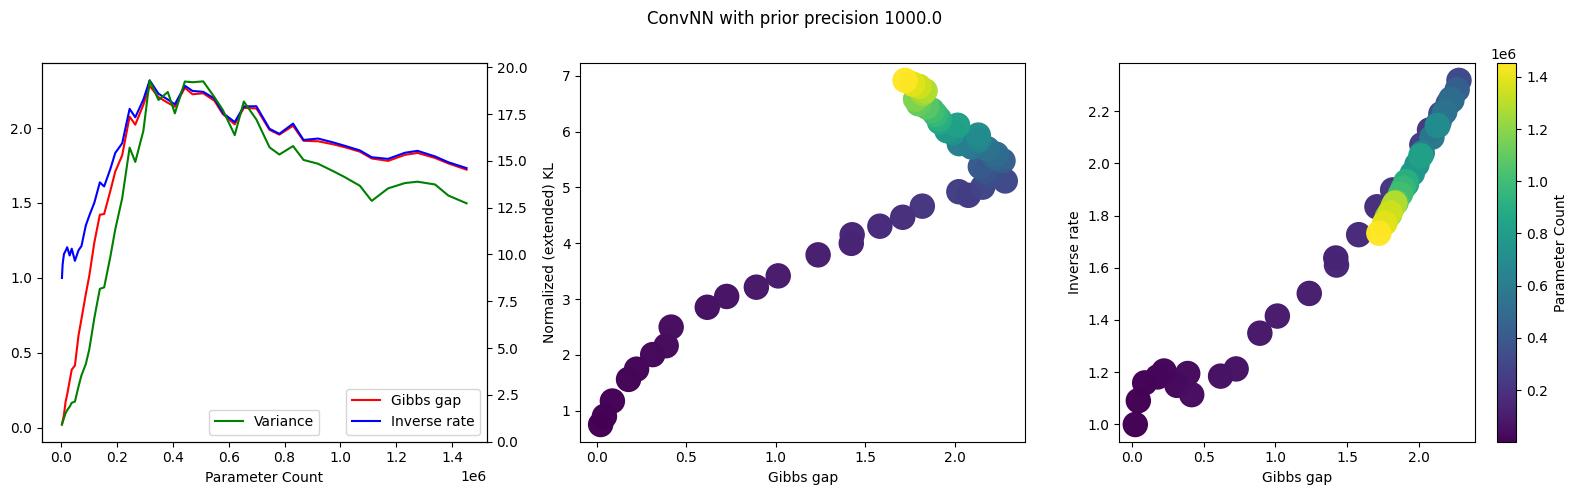

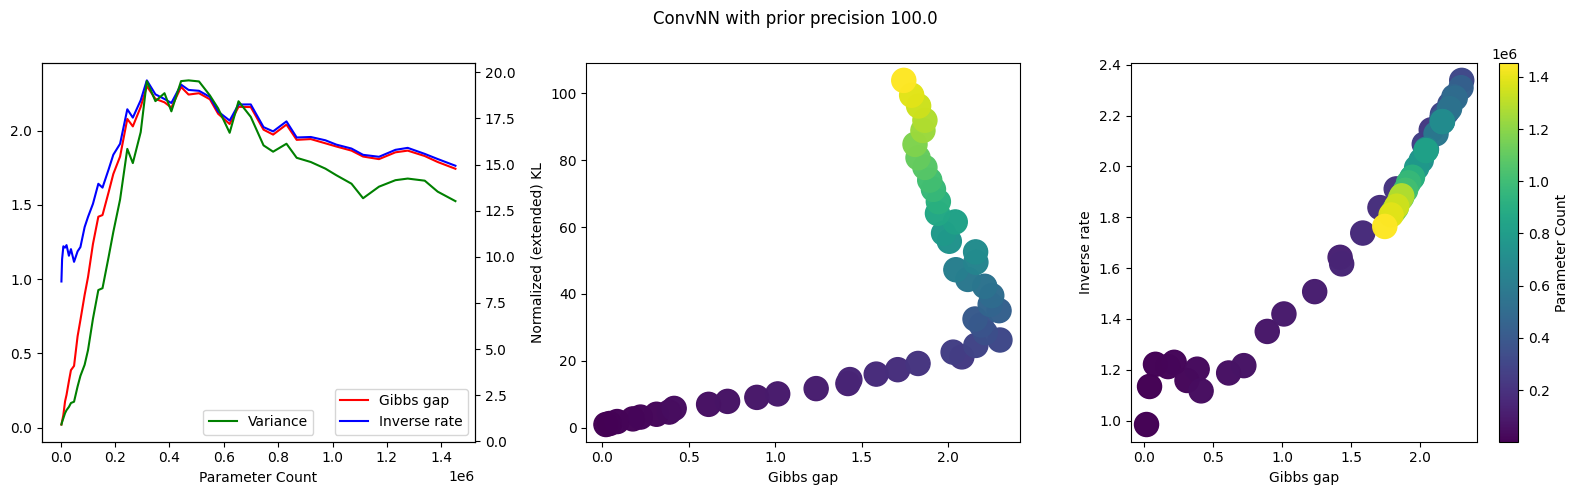

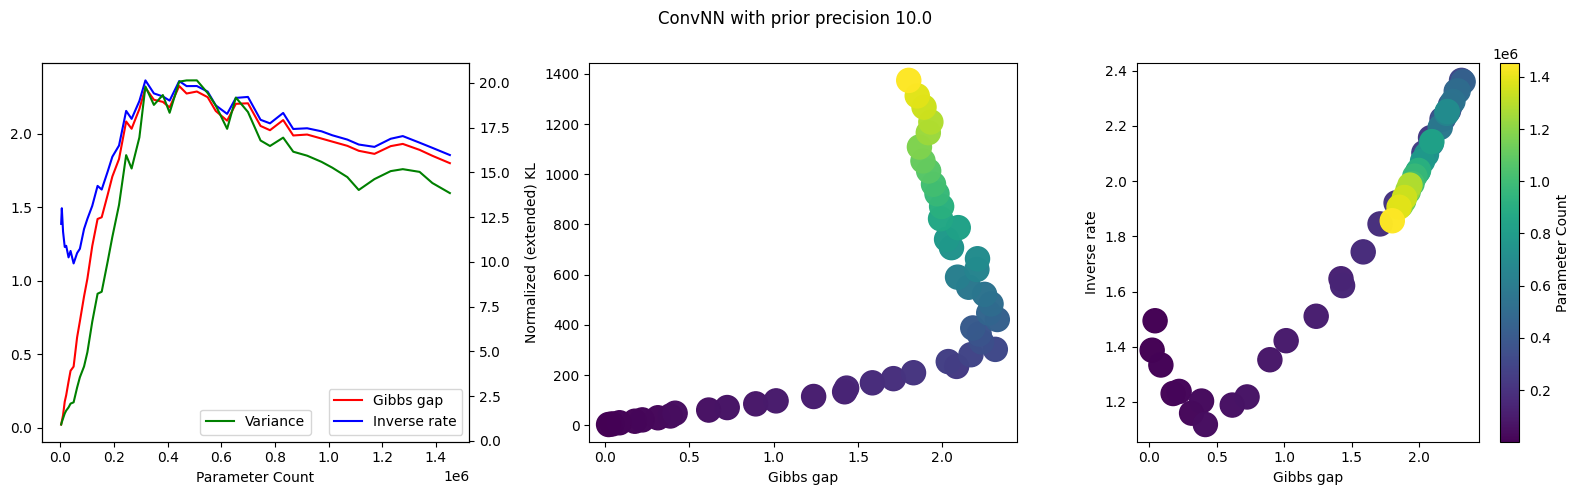

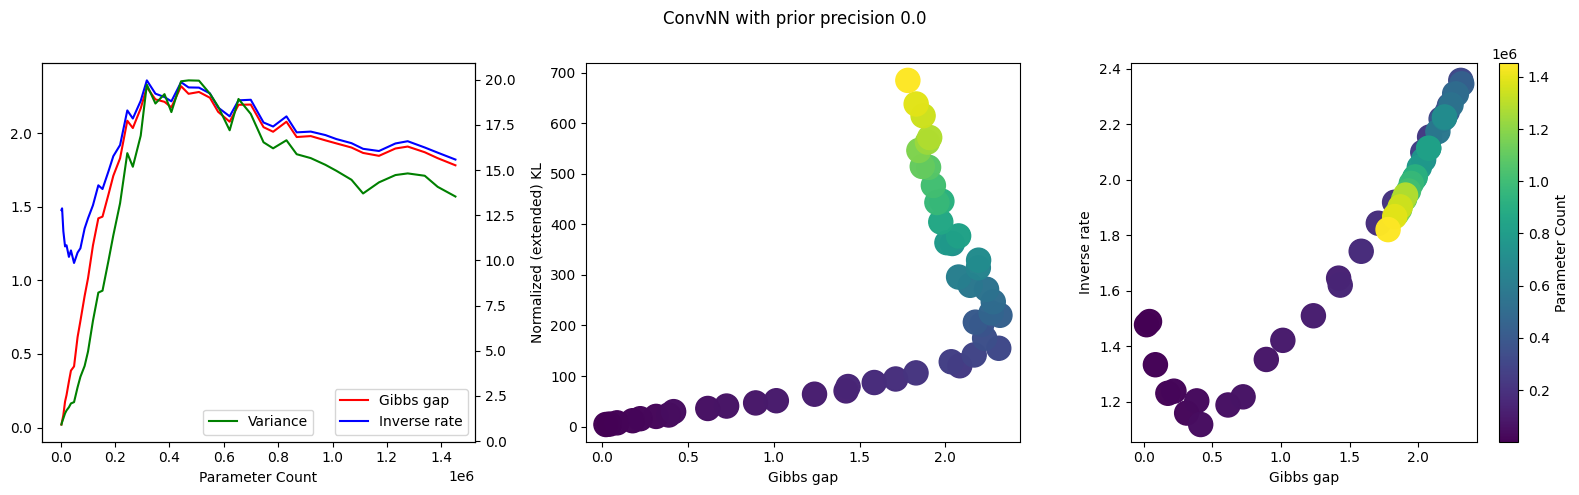

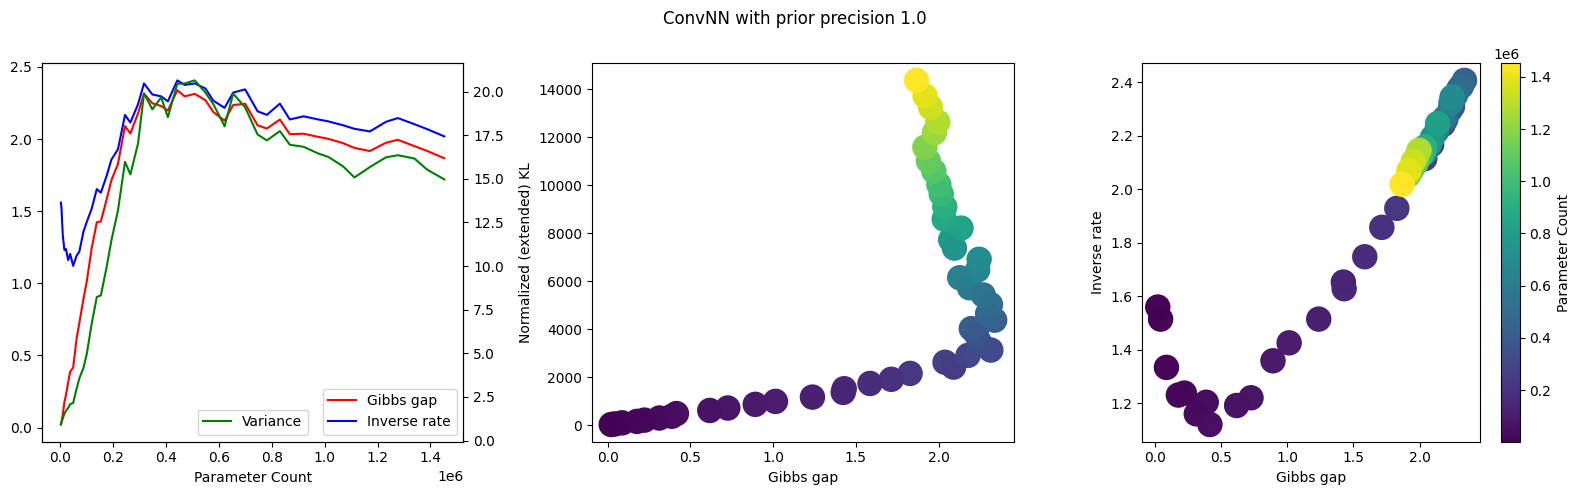

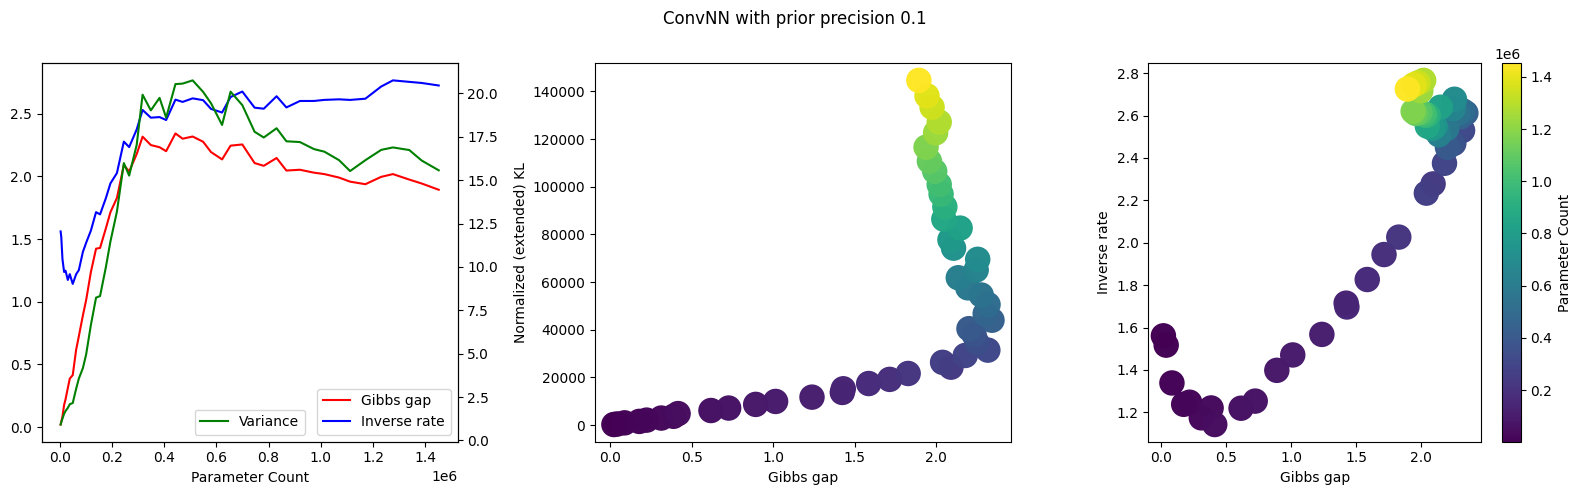

In [43]:
base_url = "https://raw.githubusercontent.com/Ludvins/PAC_Bayes_Chernoff_MLL/refs/heads/main/results/laplace_ConvNN_last_layer_kron_scalar_"
precisions = ["1000.0", "100.0", "10.0", "0.0", "1.0", "0.1"]
csv_files = [base_url + precision + "_results.csv" for precision in precisions]

x = 48
i=0

for name in csv_files:

    df = pd.read_csv(name)

    bayes_loss = df['bayes loss'].values
    gibbs_loss = df['gibbs loss'].values
    bayes_loss_train = df['bayes loss train'].values
    gibbs_loss_train = df['gibbs loss train'].values
    inverse_rate = df['inverse rate'].values
    extended_kl = df  ['expanded kl'].values/50000
    variance = df['variance'].values
    parameters = df['parameters'].values

    gibbs_gap = gibbs_loss - gibbs_loss_train
    bayes_gap = bayes_loss - bayes_loss_train
    jensen_gap = gibbs_gap - bayes_gap


    fig, ax1 = plt.subplots(1, 3, figsize=(16, 5))

    ax2 = ax1[0].twinx()

    ax1[0].plot(parameters, gibbs_gap, label='Gibbs gap', color='red')
    ax1[0].plot(parameters, inverse_rate, label='Inverse rate', color='blue')
    ax2.plot(parameters, variance, label='Variance', color='green')

    ax1[0].set_xlabel('Parameter Count')

    ax1[0].legend(loc='lower right')
    ax2.legend(loc='lower center')

    scatter = ax1[1].scatter(gibbs_gap[-x:], extended_kl[-x:], c=parameters[-x:], cmap='viridis', s=300, alpha=0.99)
    ax1[1].set_xlabel('Gibbs gap')
    ax1[1].set_ylabel('Normalized (extended) KL')

    scatter = ax1[2].scatter(gibbs_gap[-x:], inverse_rate[-x:], c=parameters[-x:], cmap='viridis', s=300, alpha=0.99)
    ax1[2].set_xlabel('Gibbs gap')
    ax1[2].set_ylabel('Inverse rate')

    cbar = plt.colorbar(scatter, ax=ax1[2])
    cbar.set_label('Parameter Count')

    fig.suptitle("ConvNN with prior precision " + precisions[i])
    fig.tight_layout()
    plt.show()
    i+=1

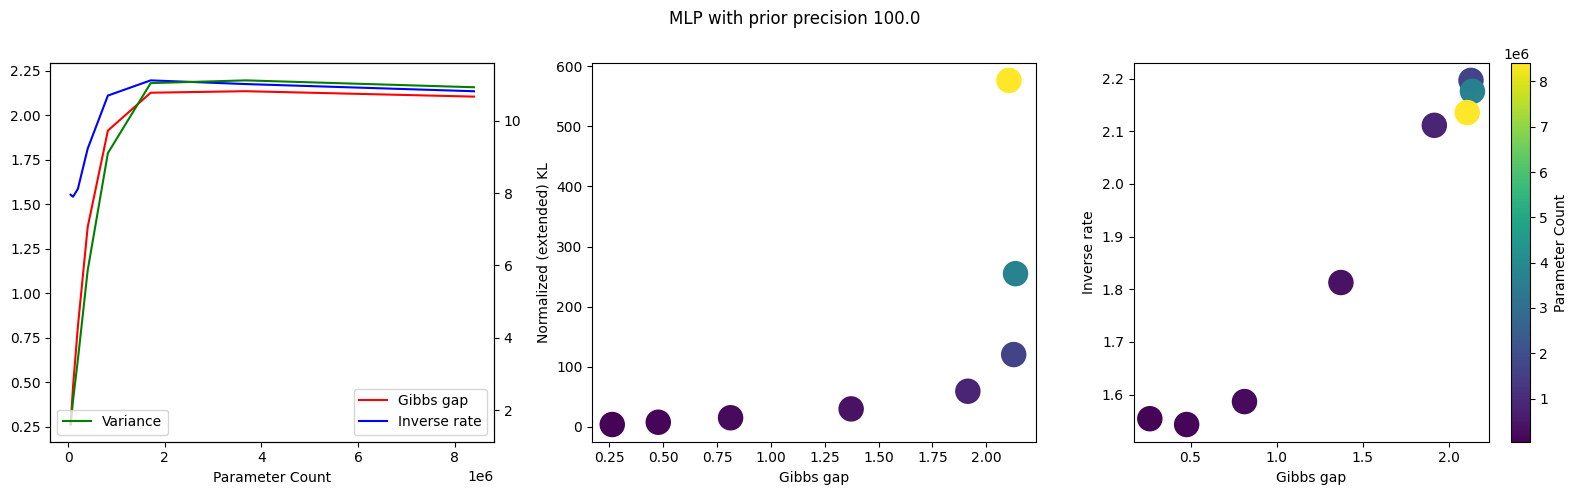

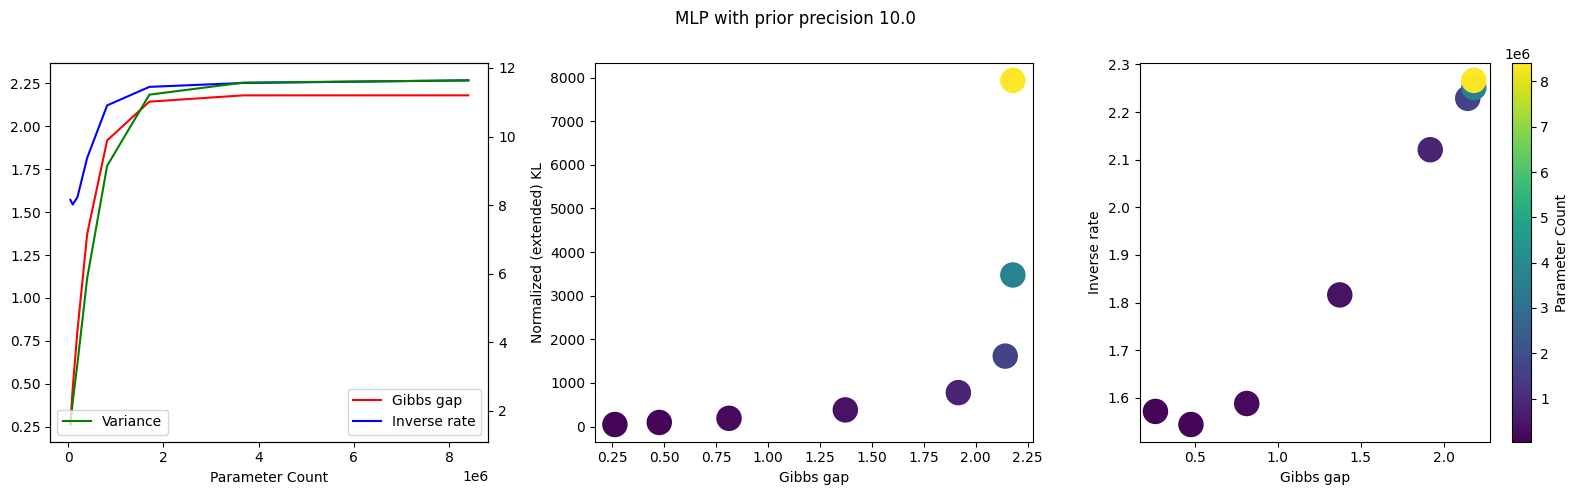

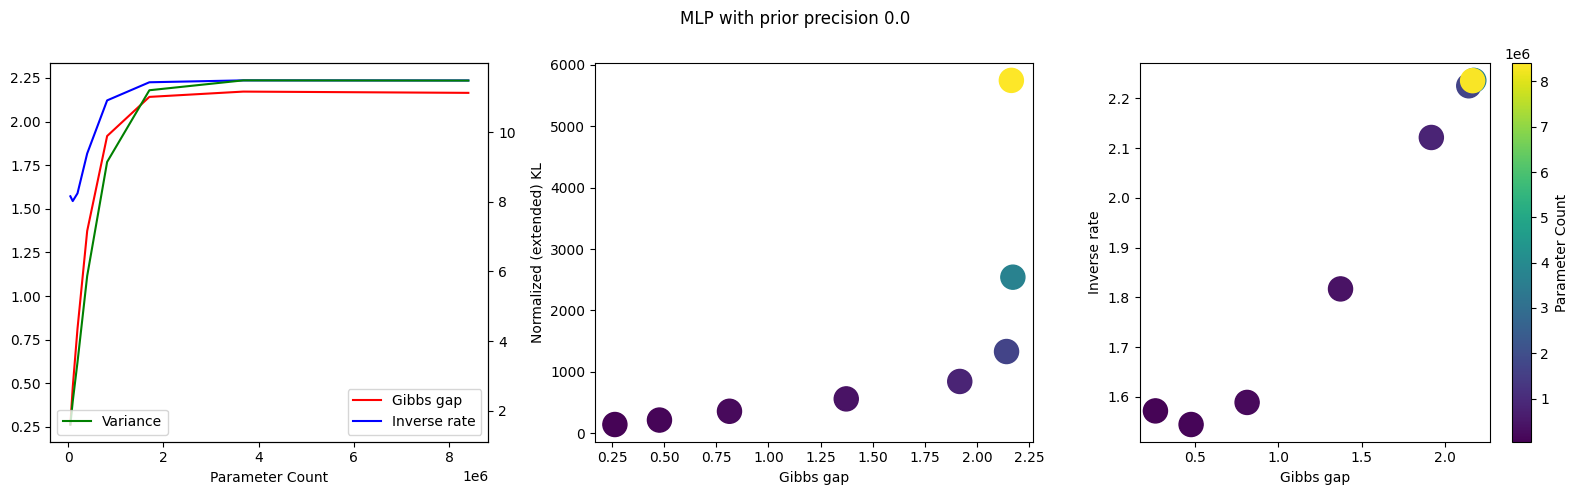

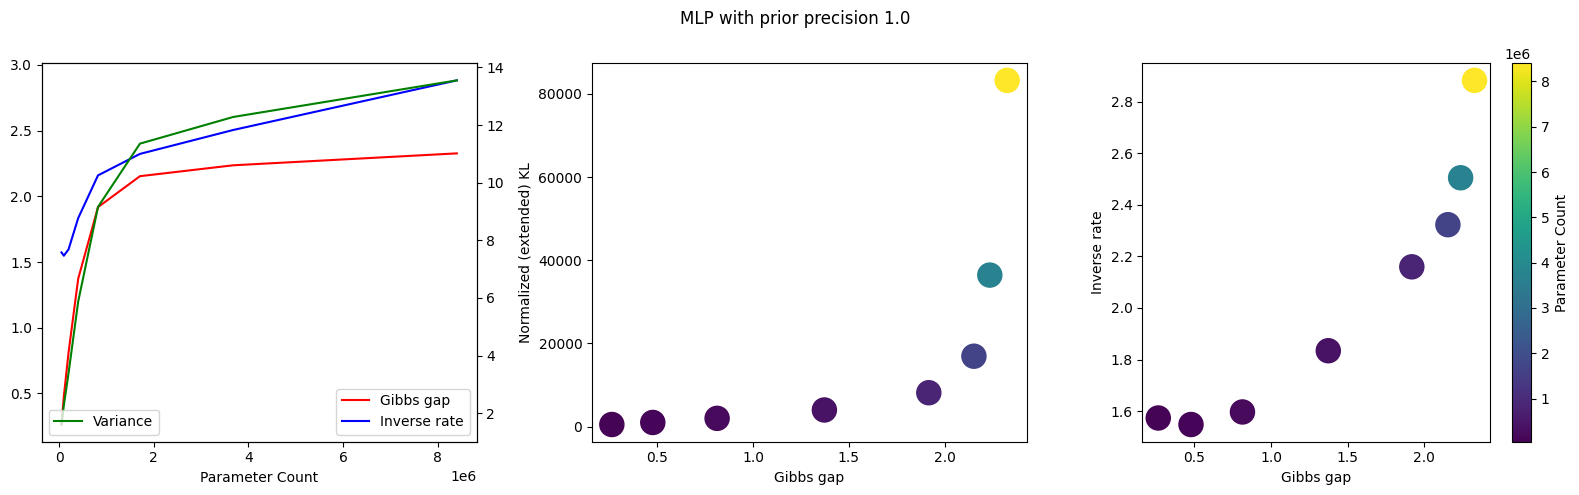

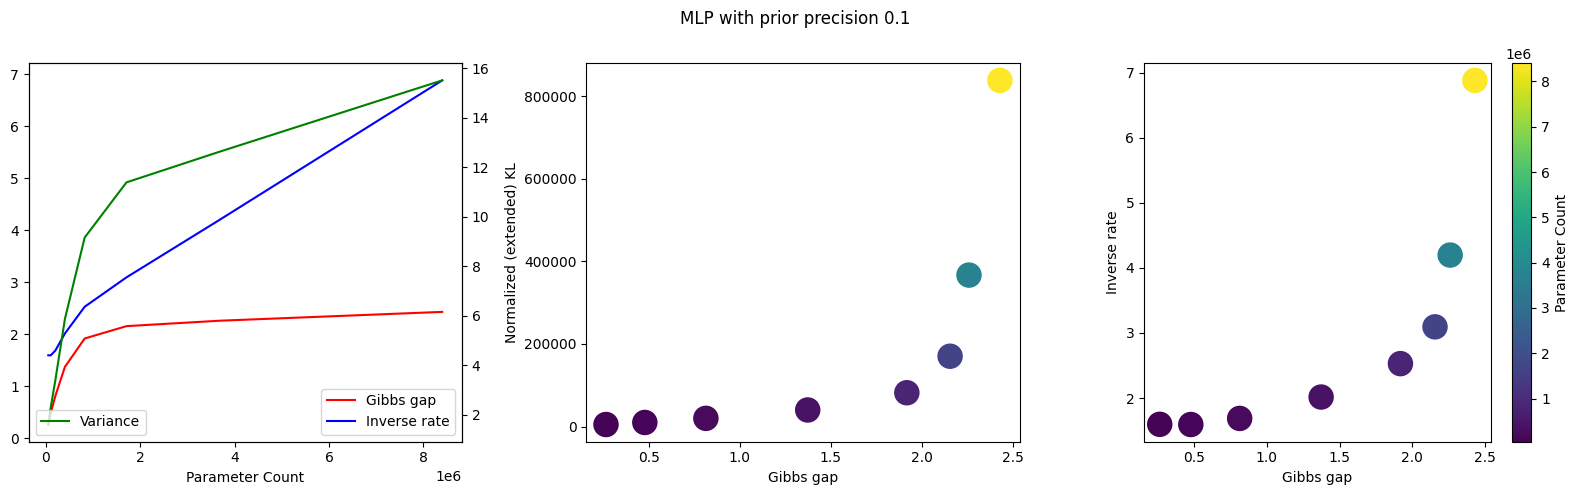

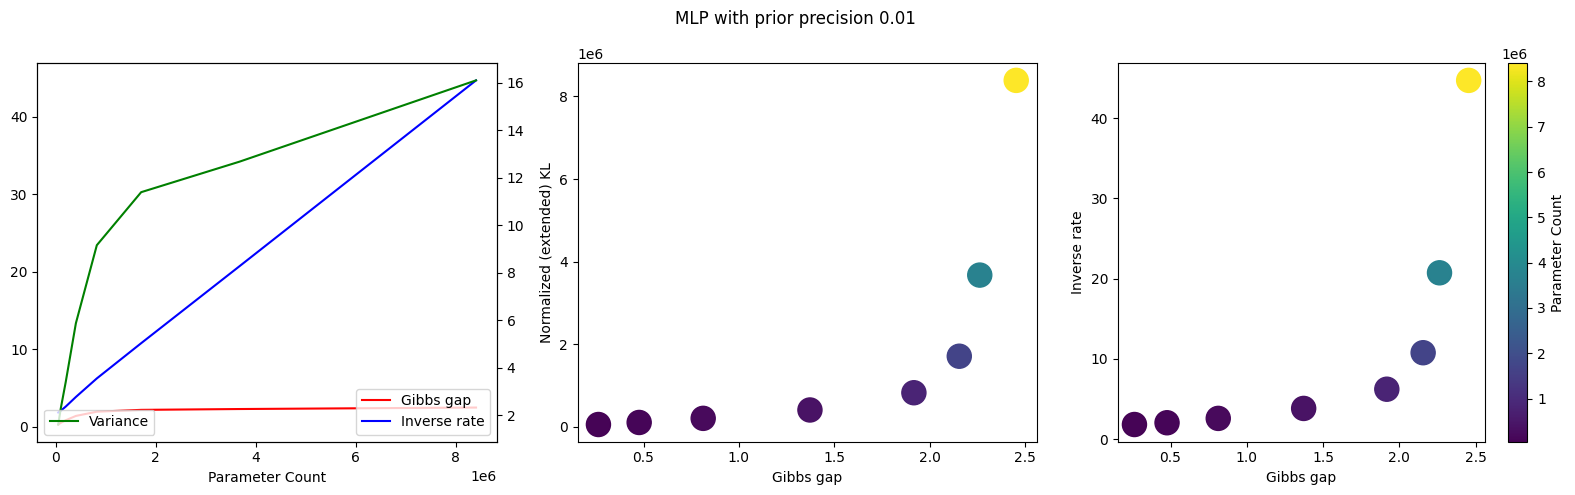

In [44]:
base_url = "https://raw.githubusercontent.com/Ludvins/PAC_Bayes_Chernoff_MLL/refs/heads/main/results/laplace_MLP_last_layer_kron_scalar_"
precisions = ["100.0", "10.0", "0.0", "1.0", "0.1", "0.01"]
csv_files = [base_url + precision + "_results.csv" for precision in precisions]

x = 8
i=0

for name in csv_files:
    df = pd.read_csv(name)

    bayes_loss = df['bayes loss'].values
    gibbs_loss = df['gibbs loss'].values
    bayes_loss_train = df['bayes loss train'].values
    gibbs_loss_train = df['gibbs loss train'].values
    inverse_rate = df['inverse rate'].values
    extended_kl = df  ['expanded kl'].values/50000
    variance = df['variance'].values
    parameters = df['parameters'].values

    gibbs_gap = gibbs_loss - gibbs_loss_train
    bayes_gap = bayes_loss - bayes_loss_train
    jensen_gap = gibbs_gap - bayes_gap


    fig, ax1 = plt.subplots(1, 3, figsize=(16, 5))

    ax2 = ax1[0].twinx()

    ax1[0].plot(parameters, gibbs_gap, label='Gibbs gap', color='red')
    ax1[0].plot(parameters, inverse_rate, label='Inverse rate', color='blue')
    ax2.plot(parameters, variance, label='Variance', color='green')

    ax1[0].set_xlabel('Parameter Count')

    ax1[0].legend(loc='lower right')
    ax2.legend(loc='lower left')

    scatter = ax1[1].scatter(gibbs_gap[-x:], extended_kl[-x:], c=parameters[-x:], cmap='viridis', s=300, alpha=0.99)
    ax1[1].set_xlabel('Gibbs gap')
    ax1[1].set_ylabel('Normalized (extended) KL')

    scatter = ax1[2].scatter(gibbs_gap[-x:], inverse_rate[-x:], c=parameters[-x:], cmap='viridis', s=300, alpha=0.99)
    ax1[2].set_xlabel('Gibbs gap')
    ax1[2].set_ylabel('Inverse rate')

    cbar = plt.colorbar(scatter, ax=ax1[2])
    cbar.set_label('Parameter Count')

    fig.suptitle("MLP with prior precision " + precisions[i])
    fig.tight_layout()
    plt.show()
    i+=1

In [ ]:
uploaded = files.upload()

Saving ConvNN_train_results.csv to ConvNN_train_results.csv


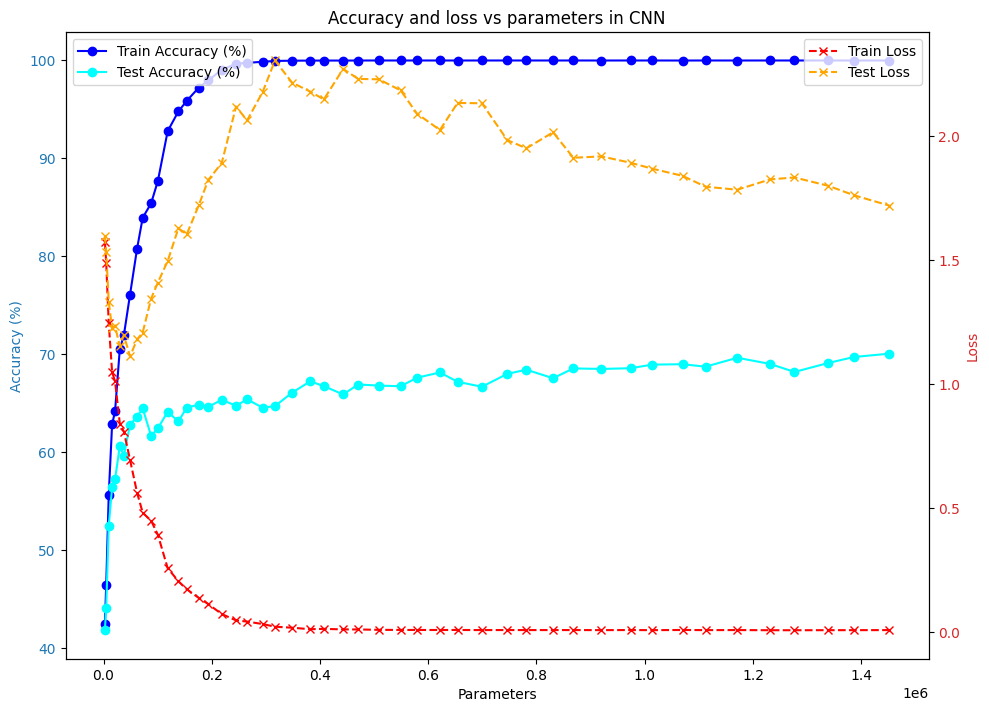

In [ ]:
for name in uploaded:
  df = pd.read_csv(name)

  train_accuracy = df['train accuracy (%)'].values
  test_accuracy = df['test accuracy (%)'].values
  train_loss = df['train loss'].values
  test_loss = df['test loss'].values
  parameters = df['parameters'].values

  # Plot train/test accuracy and train/test loss again
  fig, ax1 = plt.subplots(figsize=(10, 7))

  color = 'tab:blue'
  ax1.set_xlabel('Parameters')
  ax1.set_ylabel('Accuracy (%)', color=color)
  ax1.plot(parameters, train_accuracy, label='Train Accuracy (%)', color='blue', marker='o')
  ax1.plot(parameters, test_accuracy, label='Test Accuracy (%)', color='cyan', marker='o')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper left')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:red'
  ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
  ax2.plot(parameters, train_loss, label='Train Loss', color='red', linestyle='--', marker='x')
  ax2.plot(parameters, test_loss, label='Test Loss', color='orange', linestyle='--', marker='x')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title('Accuracy and loss vs parameters in CNN')
  plt.show()